In [2]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# PLAIcraft 

The Pacific Laboratory for Artificial Intelligence (PLAI) is a computer science research group at UBC. Their most recent project is called 'PLAICraft', a free minecraft server that records players' informations and behaviour in order to improve non-playable characters in the game with the use of AI. This data is comprised of two main files :
* the 'players' dataset, `players.csv`
* the 'sessions' dataset, `sessions.csv`

## Players

The 'players' dataset is a .csv file that contains information from every player. We can learn more about the data by loading it in.

In [8]:
# loading the 'players' dataset
players_url <- "https://raw.githubusercontent.com/20under20/dcsi100-project-group-002-13/refs/heads/main/players.csv"
players <- read_csv(players_url) # |>       # reading the 'players' dataset
           #rename(hashed_email = hashedEmail,     # tidying the 'players' dataset
                #  age = Age)   
                            
players_display <- players |> head()   # loading the first six rows of the dataset
players_display

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


As can be seen when reading the data, the 'players' dataset has **196** total rows/observations and **7** columns/variables


The following table summarizes each variable's name, type, what it means, what values it can have, and how it was collected for each player. 

 | Variable name           | Type       | Meaning                       | Possible values                    | Collection method |
 |----------------|------------|----------------------------------------|----------------------------------------|-------------|
 |  `experience`  |   `<chr>`   |  Their level of experience.    |  Amateur, Regular, Veteran, or Pro       | Sign-up form |
 |  `subscribe`  |   `<lgc>`   |  If they are subscribed to recieve emails when other contributors are on the server.  |  TRUE or FALSE    | Sign-up form |
 |  `hashed_email`  |   `<chr>`    |  Their anonymized email as an identifying token.   |  A string of 64 numbers and letters       | Sign-up form |
 |  `played_hours`  |   `<dbl>`    |  The total amount of hours they spent on PLAIcraft.   | A number rounded to it's nearest decimal | Server records |
 |  `name`  |   `<chr>`    | An anonymous name option they chose when they signed up for PLAIcraft.    |  A word or series of words connected by an '_' | Sign-up form |
 |  `gender`  |   `<chr>`    |  The gender they inputted when they signed up for PLAIcraft.     |  Amateur, Regular, Veteran, or Pro       | Sign-up form |
 |  `age`  |   `<dbl>`    |  The age they inputted when they signed up for PLAIcraft (in years.)    |  A whole number from 9-99       | Sign-up form |

## Sessions

In [80]:
# loading the 'sessions' dataset
sessions <-read_csv("data/sessions.csv") |>   # loading the 'players' dataset
           rename(hashed_email = hashedEmail) # tidying the 'players' dataset

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The 'sessions' dataset is a .csv file that contains information from every playing session.  We can learn more about the data by loading it in.

In [81]:
# loading the 'sessions' dataset
sessions <- read_csv("data/sessions.csv") |>             # reading the 'sessions' dataset
            rename(hashed_email = hashedEmail) |>        # tidying the 'sessions' dataset 
            mutate(start_time = as.POSIXct(start_time),
                   end_time = as.POSIXct(end_time))      
                                     
sessions_display <- sessions |> head()                    # loading the first six rows of the dataset
sessions_display

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30-06-20,30-06-20,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17-06-20,17-06-20,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25-07-20,25-07-20,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25-07-20,25-07-20,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25-05-20,25-05-20,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23-06-20,23-06-20,1.71916e+12,1.71916e+12


As can be seen when reading the data, the 'sessions' dataset has **1535** total rows/observations and **5** columns/variables

The following table summarizes each variable's name, type, what it means, what values it can have, and how it was collected for each session. 

 | Variable name           | Type       | Meaning                       | Possible values                    | Collection method |
 |----------------|------------|----------------------------------------|----------------------------------------|------------|
 |  `hashed_email`  |   `<chr>`    |  Their anonymized email as an identifying token.   |  A string of 64 numbers and letters       | Sign-up form |
 |  `start_time`  |   `<dttm>`    |  The date and time the session started (in PST.)   | A value in dd/mm/yyy hh:mm format | Server records |
 |  `end_time`  |   `<dttm>`    | The date and time the session ended (in PST.)    |   A value in dd/mm/yyy hh:mm format | Server records |
 |  `original_start_time`  |   `<dbl>`    |  The date and time the session started (in Unix.)  |  A five-decimal number expressed in scientific notation.  | Server records |
 |  `original_end_time`  |   `<dbl>`    |   The date and time the session ended (in Unix.)    | A five-decimal number expressed in scientific notation.       | Server records |

# Research

## Introduction

**General Questioning**: The more frequent players there are on PLAIcraft, the more data there is to base AI models off of, the more effective the non-playable characters are. So what "kinds" of players are most likely to contribute a large amount of data to PLAIcraft? What characteristics are we looking for - based on what we already have?

**Specific Question**: Can age, gender, and experience predict the total played hours per user in the 'players' dataset?

**Method Overview** : Using the k-nn regression algorithm, we can select the `age`, `gender`, and `experience` columns as predictors for `total_hours` values. We can then evaluate the RMSPE to see which of the three variables, if any, are effective at predicting the total hours spent on the server.

## Preliminary steps

In [82]:
# wrangling the data to contain only necessary variables

players_wrangled <- players |>
                    select(experience, played_hours, gender, age)
players_wrangled

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.0,Female,17
Regular,0.0,Female,19
Amateur,0.0,Male,21
Amateur,0.1,Male,17


## Exploratory Analysis

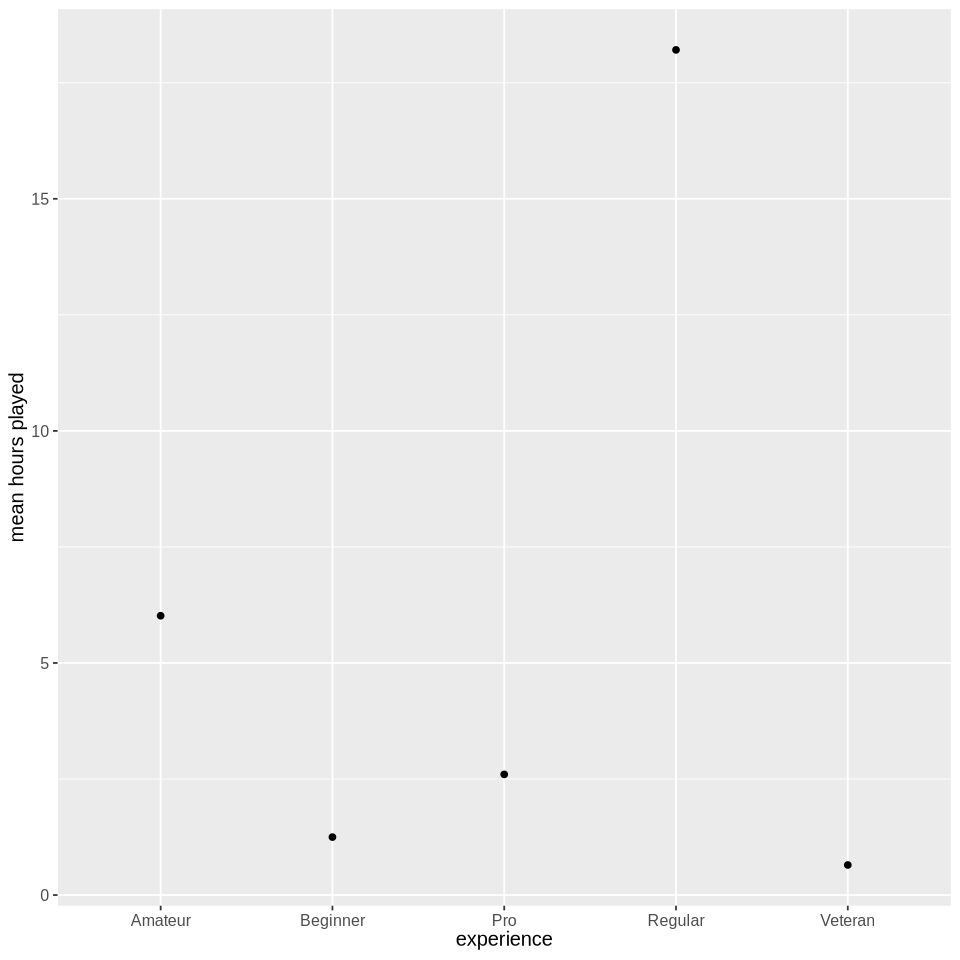

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


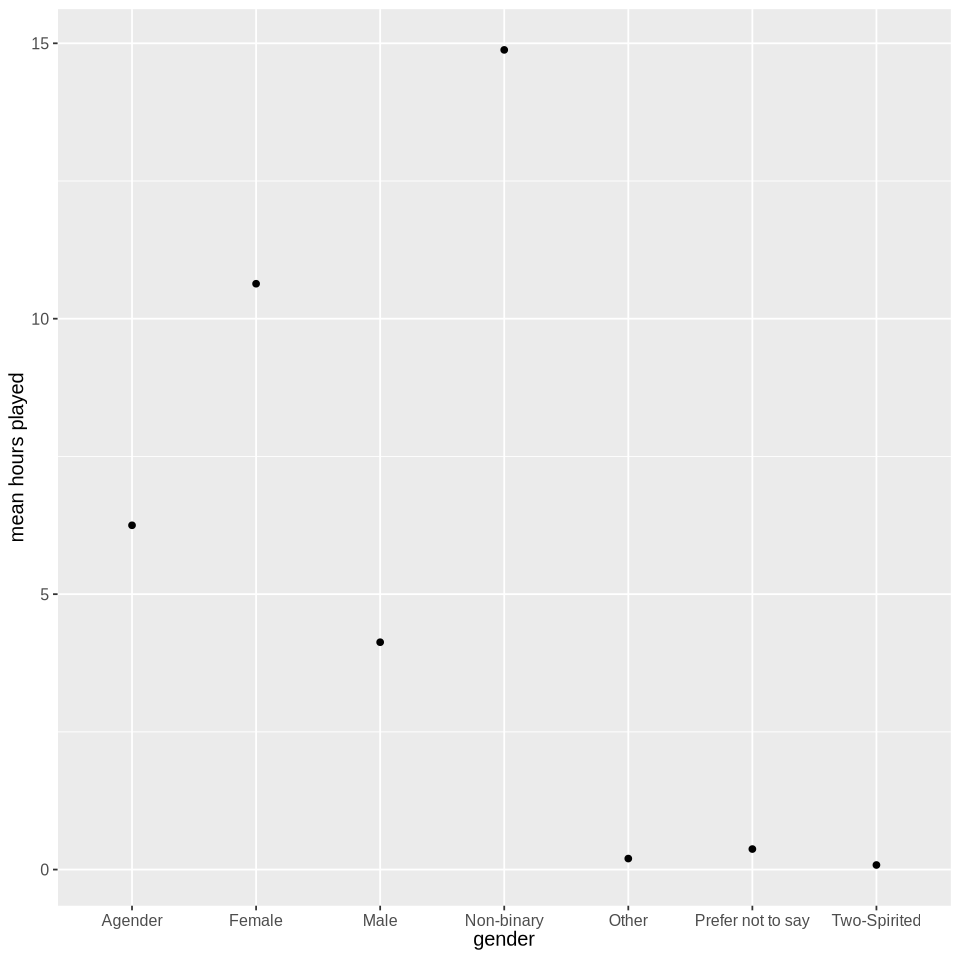

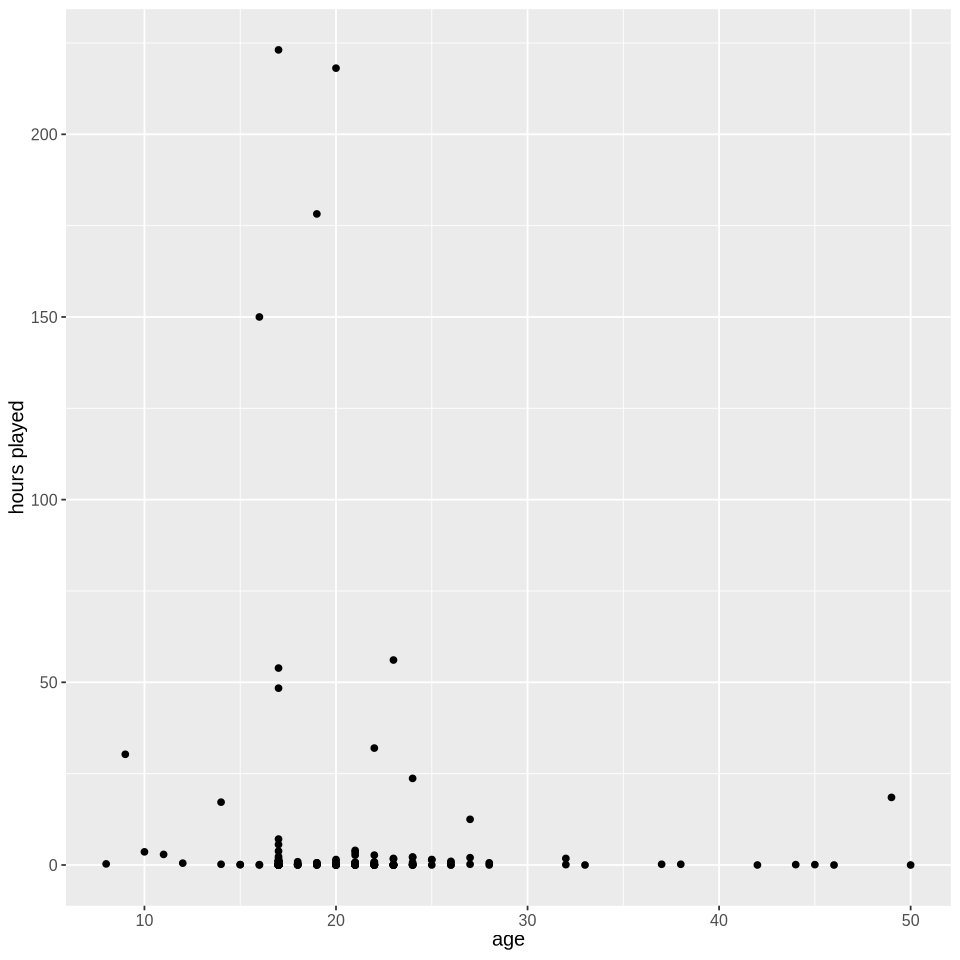

In [83]:
options(repr.plot.width = 8, repr.plot.height = 8) # Set the default size for all plots

experience_summary <- players_wrangled |>
                      group_by(experience) |>
                      summarize(
                        mean_hours = mean(played_hours))

experience_plot <- ggplot (experience_summary, aes(x = experience, 
                                                 y = mean_hours)) + 
                  geom_point() +
                       labs (
                       x = "experience",
                       y = "mean hours played") + 
                  theme(text = element_text(size = 12))  
experience_plot

gender_summary <- players_wrangled |>
                      group_by(gender) |>
                      summarize(
                        mean_hours = mean(played_hours))

gender_plot <- ggplot (gender_summary, aes(x = gender, 
                                           y = mean_hours)) + 
                  geom_point() +
                       labs (
                       x = "gender",
                       y = "mean hours played") + 
                  theme(text = element_text(size = 12))  
gender_plot

age_plot <- ggplot (players_wrangled, aes(x = age, 
                                         y = played_hours, )) + 
                   geom_point() +
                   labs (
                       x = "age",
                       y = "hours played") + 
                  theme(text = element_text(size = 12))
age_plot

## Plan
1. Split data into training set (60%) and testing set (30%).
2. Create a recipe `player_recipe` that with the training set where `experience`, `gender` and `age` predict `played_hours`, scaling and centering the data as preprocessing steps.
3. Create an initial model `knn_spec` using KNN regression on the training set, using tuning for 'k'.
4. Using five-fold cross-validation, find the k from the interval [1, 10] which has the lowest rmse.
5. Create a new KNN regression model `player_spec`using the k found in step 4.
6. Combine `player_recipe` and `player_spec` into a workflow and use it to predict data from the testing set.
7. Evaluate the effectiveness of the regression model by creating metrics and extracting the rmspe.
8. Interpret the rmspe : the closer the rmspe is to 0, the more predictive that experience, gender and age are of played hours.